## You're here! 
Welcome to your first competition in the [ITI's AI Pro training program](https://ai.iti.gov.eg/epita/ai-engineer/)! We hope you enjoy and learn as much as we did prepairing this competition.


## Introduction

In the competition, it's required to predict the `Severity` of a car crash given info about the crash, e.g., location.

This is the getting started notebook. Things are kept simple so that it's easier to understand the steps and modify it.

Feel free to `Fork` this notebook and share it with your modifications **OR** use it to create your submissions.

### Prerequisites
You should know how to use python and a little bit of Machine Learning. You can apply the techniques you learned in the training program and submit the new solutions! 

### Checklist
You can participate in this competition the way you perefer. However, I recommend following these steps if this is your first time joining a competition on Kaggle.

* Fork this notebook and run the cells in order.
* Submit this solution.
* Make changes to the data processing step as you see fit.
* Submit the new solutions.

*You can submit up to 5 submissions per day. You can select only one of the submission you make to be considered in the final ranking.*


Don't hesitate to leave a comment or contact me if you have any question!

## Import the libraries

We'll use `pandas` to load and manipulate the data. Other libraries will be imported in the relevant sections.

In [1]:
import pandas as pd
import os
import datetime
import calendar
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt



## Exploratory Data Analysis
In this step, one should load the data and analyze it. However, I'll load the data and do minimal analysis. You are encouraged to do thorough analysis!

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [2]:
dataset_path = '/kaggle/input/car-crashes-severity-prediction/'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


We've got 6407 examples in the dataset with 14 featues, 1 ID, and the `Severity` of the crash.

By looking at the features and a sample from the data, the features look of numerical and catogerical types. What about some descriptive statistics?

In [3]:
df.drop(columns='ID').describe()

,Lat,Lng,Distance(mi),Severity
count,6407.000000,6407.000000,6407.000000,6407.000000
mean,37.765653,-122.405990,0.135189,2.293429
std,0.032555,0.028275,0.396360,0.521225
min,37.609619,-122.510440,0.000000,1.000000
25%,37.737096,-122.412210,0.000000,2.000000
50%,37.768238,-122.404835,0.000000,2.000000
75%,37.787813,-122.392477,0.041000,3.000000
max,37.825626,-122.349734,6.820000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6407 non-null   int64  
 1   Lat           6407 non-null   float64
 2   Lng           6407 non-null   float64
 3   Bump          6407 non-null   bool   
 4   Distance(mi)  6407 non-null   float64
 5   Crossing      6407 non-null   bool   
 6   Give_Way      6407 non-null   bool   
 7   Junction      6407 non-null   bool   
 8   No_Exit       6407 non-null   bool   
 9   Railway       6407 non-null   bool   
 10  Roundabout    6407 non-null   bool   
 11  Stop          6407 non-null   bool   
 12  Amenity       6407 non-null   bool   
 13  Side          6407 non-null   object 
 14  Severity      6407 non-null   int64  
 15  timestamp     6407 non-null   object 
dtypes: bool(9), float64(3), int64(2), object(2)
memory usage: 406.8+ KB


# **Reading test data**

In [5]:
dataset_path = '/kaggle/input/car-crashes-severity-prediction/'

test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))

print("The shape of the dataset is {}.\n\n".format(test_df.shape))

test_df.head()

The shape of the dataset is (1601, 15).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1601 non-null   int64  
 1   Lat           1601 non-null   float64
 2   Lng           1601 non-null   float64
 3   Bump          1601 non-null   bool   
 4   Distance(mi)  1601 non-null   float64
 5   Crossing      1601 non-null   bool   
 6   Give_Way      1601 non-null   bool   
 7   Junction      1601 non-null   bool   
 8   No_Exit       1601 non-null   bool   
 9   Railway       1601 non-null   bool   
 10  Roundabout    1601 non-null   bool   
 11  Stop          1601 non-null   bool   
 12  Amenity       1601 non-null   bool   
 13  Side          1601 non-null   object 
 14  timestamp     1601 non-null   object 
dtypes: bool(9), float64(3), int64(1), object(2)
memory usage: 89.2+ KB


# ****Read Weather data****

In [7]:

weather = pd.read_csv(os.path.join(dataset_path, 'weather-sfcsv.csv'))

print("The shape of the dataset is {}.\n\n".format(weather.shape))

weather.head()

The shape of the dataset is (6901, 12).




,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.0,0.0,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,NaN,NaN,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,NaN,NaN,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,NaN,NaN,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.0,0.0,52.0,89.0,0.0,9.0,No


In [8]:
weather.describe()

,Year,Day,Month,Hour,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
count,6901.000000,6901.000000,6901.000000,6901.000000,3292.000000,3574.000000,6899.000000,6899.000000,6556.000000,6900.000000
mean,2018.293001,15.624837,6.775250,12.789886,59.762515,0.006444,59.905465,68.570952,10.813164,9.441851
std,1.390524,8.703753,3.567982,5.874155,9.338456,0.028822,7.977860,16.180126,6.406376,1.640513
min,2016.000000,1.000000,1.000000,0.000000,31.100000,0.000000,36.000000,10.000000,0.000000,0.000000
25%,2017.000000,8.000000,4.000000,8.000000,54.000000,0.000000,54.000000,59.000000,5.800000,10.000000
50%,2019.000000,15.000000,7.000000,14.000000,59.000000,0.000000,59.000000,70.000000,10.000000,10.000000
75%,2020.000000,23.000000,10.000000,17.000000,66.000000,0.000000,64.900000,80.000000,15.000000,10.000000
max,2020.000000,31.000000,12.000000,23.000000,98.000000,0.490000,98.100000,100.000000,40.300000,10.000000


In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6900 non-null   object 
 5   Wind_Chill(F)      3292 non-null   float64
 6   Precipitation(in)  3574 non-null   float64
 7   Temperature(F)     6899 non-null   float64
 8   Humidity(%)        6899 non-null   float64
 9   Wind_Speed(mph)    6556 non-null   float64
 10  Visibility(mi)     6900 non-null   float64
 11  Selected           6901 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 647.1+ KB


# **Read xml file**

In [10]:
#reading xml file using pandas and ElementTree
import xml.etree.ElementTree as et 
import pandas as pd

xtree = et.parse("../input/car-crashes-severity-prediction/holidays.xml")
xroot = xtree.getroot() 

df_cols = ['date', 'description']
rows = []

for node in xroot:
    s_date = node.find("date").text if node is not None else None
    s_description = node.find("description").text if node is not None else None
    
    rows.append({"date": s_date, "description": s_description})

holidays = pd.DataFrame(rows, columns = df_cols)
holidays.rename(columns={"description": "holiday"}, inplace=True)

print("The shape of the hoildays.xml file is {}.\n\n".format(holidays.shape))

holidays.head()



The shape of the hoildays.xml file is (90, 2).




,date,holiday
0,2012-01-02,New Year Day
1,2012-01-16,Martin Luther King Jr. Day
2,2012-02-20,Presidents Day (Washingtons Birthday)
3,2012-05-28,Memorial Day
4,2012-07-04,Independence Day


# ** Working with training data set **

In [11]:
new_df = df.drop(columns='Bump')
print(new_df.head())

   ID        Lat         Lng  Distance(mi)  Crossing  Give_Way  Junction  \
0   0  37.762150 -122.405660         0.044     False     False     False   
1   1  37.719157 -122.448254         0.000     False     False     False   
2   2  37.808498 -122.366852         0.000     False     False     False   
3   3  37.785930 -122.391080         0.009     False     False      True   
4   4  37.719141 -122.448457         0.000     False     False     False   

   No_Exit  Railway  Roundabout   Stop  Amenity Side  Severity  \
0    False    False       False  False     True    R         2   
1    False    False       False  False    False    R         2   
2    False    False       False   True    False    R         3   
3    False    False       False  False    False    R         1   
4    False    False       False  False    False    R         2   

             timestamp  
0  2016-03-25 15:13:02  
1  2020-05-05 19:23:00  
2  2016-09-16 19:57:16  
3  2020-03-29 19:48:43  
4  2019-10-09 08:47:0

**Creating rush hour list**

In [12]:
'''size = len(new_df)
for i in range(size):
    if new_df['Severity'][i] == 1 or  new_df['Severity'][i] == 4:
        row = new_df.iloc[i]
        for j in range(3):
            new_df.index +=1
            new_df.loc[-1] = row
'''        

"size = len(new_df)\nfor i in range(size):\n    if new_df['Severity'][i] == 1 or  new_df['Severity'][i] == 4:\n        row = new_df.iloc[i]\n        for j in range(3):\n            new_df.index +=1\n            new_df.loc[-1] = row\n"

In [13]:
#cerating new list containing rush hours from timestamps
rush_hour = []
bool_rush_hour = []
for row in new_df.iterrows():
    rush_hour.append((row[1][14][11:16].split(":")))

for hour, minute in rush_hour:
    if int (hour) >= 7 and int (hour) <= 9:
        bool_rush_hour.append(True)
    elif int (hour) >=16 and int (hour) <= 19:
        bool_rush_hour.append(True)
    else:
        bool_rush_hour.append(False)

In [14]:
# checking timestamp
new_df["timestamp"]

0       2016-03-25 15:13:02
1       2020-05-05 19:23:00
2       2016-09-16 19:57:16
3       2020-03-29 19:48:43
4       2019-10-09 08:47:00
               ...         
6402    2017-10-01 18:36:13
6403    2018-10-23 07:40:27
6404    2019-10-28 15:45:00
6405    2019-05-04 13:45:31
6406    2020-02-28 19:43:00
Name: timestamp, Length: 6407, dtype: object

# **convert timestamp to day-week**

In [15]:
def findDay(date):
    born = datetime.datetime.strptime(date, '%Y %m %d').weekday()
    return (calendar.day_name[born])

datetimelist=[]
day_week=[]
for row in new_df.iterrows():
    datetimelist.append(row[1][14][:10].replace('-',' '))
date = '03 02 2019'

for element in datetimelist:
   
    day_week.append(findDay(element))

day_week[:10]

['Friday',
 'Tuesday',
 'Friday',
 'Sunday',
 'Wednesday',
 'Sunday',
 'Wednesday',
 'Friday',
 'Sunday',
 'Wednesday']

In [16]:
def convert_days_tonumbers(lists):
    for idx in range(len(lists)):
        if lists[idx]=='Saturday':
            lists[idx]=1
        elif lists[idx]=='Sunday':
            lists[idx]=2
        elif lists[idx]=='Monday':
            lists[idx]=3
        elif lists[idx]=='Tuesday':
            lists[idx]=4
        elif lists[idx]=='Wednesday':
            lists[idx]=5
        elif lists[idx]=='Thursday':
            lists[idx]=6
        elif lists[idx]=='Friday':
            lists[idx]=7
    return lists

In [17]:
day_week=convert_days_tonumbers(day_week)

In [18]:
new_df["Day"]=day_week
new_df["Rush-hour"]=bool_rush_hour

In [19]:
new_df.head()

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp,Day,Rush-hour
0,0,37.762150,-122.405660,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02,7,False
1,1,37.719157,-122.448254,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00,4,True
2,2,37.808498,-122.366852,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16,7,True
3,3,37.785930,-122.391080,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43,2,True
4,4,37.719141,-122.448457,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00,5,True


# **Converting Categorical data to numerical**

In [20]:
ord_enc = OrdinalEncoder()
new_df["Crossing"] = ord_enc.fit_transform(new_df[["Crossing"]])
new_df["Give_Way"] = ord_enc.fit_transform(new_df[["Give_Way"]])
new_df["Junction"] = ord_enc.fit_transform(new_df[["Junction"]])
new_df["No_Exit"] = ord_enc.fit_transform(new_df[["No_Exit"]])
new_df["Railway"] = ord_enc.fit_transform(new_df[["Railway"]])
new_df["Roundabout"] = ord_enc.fit_transform(new_df[["Roundabout"]])
new_df["Stop"] = ord_enc.fit_transform(new_df[["Stop"]])
new_df["Amenity"] = ord_enc.fit_transform(new_df[["Amenity"]])
new_df["Side"] = ord_enc.fit_transform(new_df[["Side"]])

new_df.head()


,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp,Day,Rush-hour
0,0,37.762150,-122.405660,0.044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,2016-03-25 15:13:02,7,False
1,1,37.719157,-122.448254,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2020-05-05 19:23:00,4,True
2,2,37.808498,-122.366852,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3,2016-09-16 19:57:16,7,True
3,3,37.785930,-122.391080,0.009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2020-03-29 19:48:43,2,True
4,4,37.719141,-122.448457,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2019-10-09 08:47:00,5,True


In [21]:
'''
Crossing=new_df['Crossing']
Give_Way=new_df['Give_Way']
Junction=new_df['Junction']
No_Exit=new_df['No_Exit']
Railway=new_df['Railway']
new_reduction_list=[]
for idx in range(len(Crossing)):
    x=0
    if(Crossing[idx]==1):
        x+=1
    if(Give_Way[idx]==1):
        x+=1
    if(Junction[idx]==1):
        x+=1
    if(No_Exit[idx]==1):
        x+=1
    if(Railway[idx]==1):
        x+=1
    new_reduction_list.append(x)
new_df['FeatureReduced']=new_reduction_list
'''

"\nCrossing=new_df['Crossing']\nGive_Way=new_df['Give_Way']\nJunction=new_df['Junction']\nNo_Exit=new_df['No_Exit']\nRailway=new_df['Railway']\nnew_reduction_list=[]\nfor idx in range(len(Crossing)):\n    x=0\n    if(Crossing[idx]==1):\n        x+=1\n    if(Give_Way[idx]==1):\n        x+=1\n    if(Junction[idx]==1):\n        x+=1\n    if(No_Exit[idx]==1):\n        x+=1\n    if(Railway[idx]==1):\n        x+=1\n    new_reduction_list.append(x)\nnew_df['FeatureReduced']=new_reduction_list\n"

In [22]:
new_df.drop(columns='ID').describe()

,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,Day
count,6407.000000,6407.000000,6407.000000,6407.00000,6407.000000,6407.000000,6407.000000,6407.000000,6407.0,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,37.765653,-122.405990,0.135189,0.08241,0.000468,0.246449,0.000156,0.026533,0.0,0.097706,0.037147,0.949274,2.293429,4.431715
std,0.032555,0.028275,0.396360,0.27501,0.021635,0.430977,0.012493,0.160728,0.0,0.296939,0.189136,0.219454,0.521225,1.897954
min,37.609619,-122.510440,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000
25%,37.737096,-122.412210,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.000000,3.000000
50%,37.768238,-122.404835,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.000000,5.000000
75%,37.787813,-122.392477,0.041000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,3.000000,6.000000
max,37.825626,-122.349734,6.820000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,4.000000,7.000000


In [23]:
#new_df=new_df.drop(columns='Day')
#new_df.head()def convert_days_tonumbers(lists):


# **Visualising heatmap**

<AxesSubplot:>

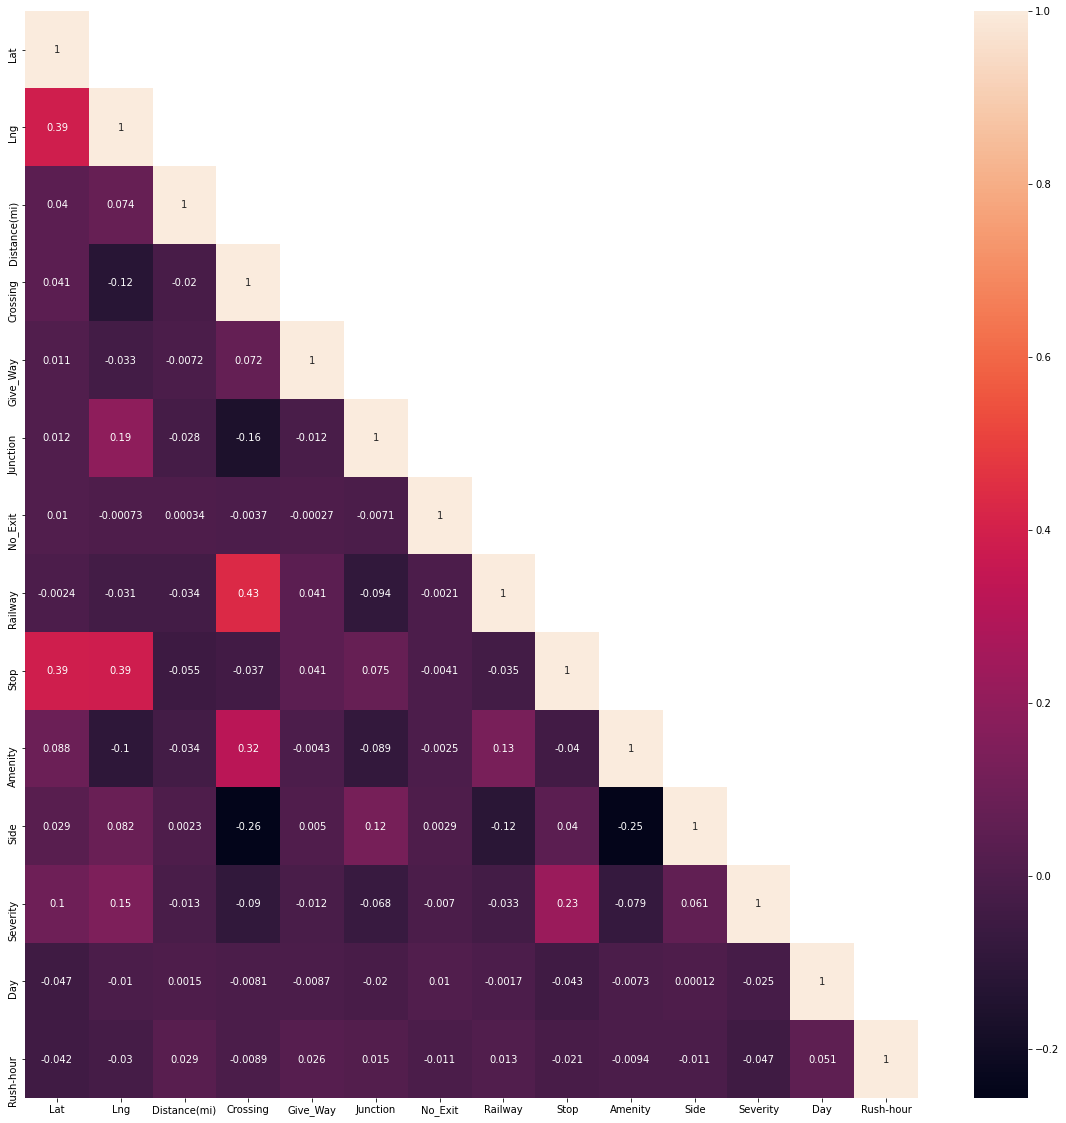

In [24]:
fig, ax = plt.subplots(figsize=(20,20))
cormat= new_df.drop(columns=['ID','Roundabout']).corr()
mask = np.array(cormat)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(cormat,mask=mask,annot=True)

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6407 non-null   int64  
 1   Lat           6407 non-null   float64
 2   Lng           6407 non-null   float64
 3   Distance(mi)  6407 non-null   float64
 4   Crossing      6407 non-null   float64
 5   Give_Way      6407 non-null   float64
 6   Junction      6407 non-null   float64
 7   No_Exit       6407 non-null   float64
 8   Railway       6407 non-null   float64
 9   Roundabout    6407 non-null   float64
 10  Stop          6407 non-null   float64
 11  Amenity       6407 non-null   float64
 12  Side          6407 non-null   float64
 13  Severity      6407 non-null   int64  
 14  timestamp     6407 non-null   object 
 15  Day           6407 non-null   int64  
 16  Rush-hour     6407 non-null   bool   
dtypes: bool(1), float64(12), int64(3), object(1)
memory usage: 807.3+ KB


# **Working With weather dataset**

> **Removing nulls**

In [26]:
weather['Wind_Chill(F)'].head()
weather['Wind_Chill(F)'].fillna(weather['Wind_Chill(F)'].mean(),inplace=True)

In [27]:
weather['Wind_Chill(F)'].head(50)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6900 non-null   object 
 5   Wind_Chill(F)      6901 non-null   float64
 6   Precipitation(in)  3574 non-null   float64
 7   Temperature(F)     6899 non-null   float64
 8   Humidity(%)        6899 non-null   float64
 9   Wind_Speed(mph)    6556 non-null   float64
 10  Visibility(mi)     6900 non-null   float64
 11  Selected           6901 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 647.1+ KB


In [28]:
weather['Precipitation(in)'].head()
weather['Precipitation(in)'].fillna(weather['Precipitation(in)'].mean(),inplace=True)
#weather.dropna()

In [29]:
weather.head()

,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected
0,2020,27,7,18,Fair,64.000000,0.000000,64.0,70.0,20.0,10.0,No
1,2017,30,9,17,Partly Cloudy,59.762515,0.006444,71.1,57.0,9.2,10.0,No
2,2017,27,6,5,Overcast,59.762515,0.006444,57.9,87.0,15.0,9.0,No
3,2016,7,9,9,Clear,59.762515,0.006444,66.9,73.0,4.6,10.0,No
4,2019,19,10,2,Fair,52.000000,0.000000,52.0,89.0,0.0,9.0,No


In [30]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6901 non-null   int64  
 1   Day                6901 non-null   int64  
 2   Month              6901 non-null   int64  
 3   Hour               6901 non-null   int64  
 4   Weather_Condition  6900 non-null   object 
 5   Wind_Chill(F)      6901 non-null   float64
 6   Precipitation(in)  6901 non-null   float64
 7   Temperature(F)     6899 non-null   float64
 8   Humidity(%)        6899 non-null   float64
 9   Wind_Speed(mph)    6556 non-null   float64
 10  Visibility(mi)     6900 non-null   float64
 11  Selected           6901 non-null   object 
dtypes: float64(6), int64(4), object(2)
memory usage: 647.1+ KB


In [31]:
weather['Temperature(F)'].head()
weather['Temperature(F)'].fillna(98.6,inplace=True)

In [32]:
#Weather_Condition
weather['Weather_Condition'].head()
weather['Weather_Condition'].fillna('Clear',inplace=True)

In [33]:
weather['Wind_Speed(mph)'].head()
weather['Wind_Speed(mph)'].fillna(weather['Wind_Speed(mph)'].mean(),inplace=True)

In [34]:
for i in weather.columns[weather.isnull().any(axis=0)]:    
    weather[i].fillna(weather[i].mean(),inplace=True)


**Merge Training dataset and Weather**

In [35]:
timestamp = new_df['timestamp']
Date = [i[:11]for i in timestamp ]
Hour = [i[11:13]for i in timestamp ]
new_df['date'] = Date
new_df['Hour'] = Hour
new_df['date']= pd.to_datetime(new_df['date'])
new_df['Hour']= new_df['Hour'].astype(int)
new_df.head()

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp,Day,Rush-hour,date,Hour
0,0,37.762150,-122.405660,0.044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,2016-03-25 15:13:02,7,False,2016-03-25,15
1,1,37.719157,-122.448254,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2020-05-05 19:23:00,4,True,2020-05-05,19
2,2,37.808498,-122.366852,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3,2016-09-16 19:57:16,7,True,2016-09-16,19
3,3,37.785930,-122.391080,0.009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2020-03-29 19:48:43,2,True,2020-03-29,19
4,4,37.719141,-122.448457,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2019-10-09 08:47:00,5,True,2019-10-09,8


In [36]:
Date = [str(weather['Year'][i])+'-'+ "{:02d}".format(weather['Month'][i])+'-'+"{:02d}".format(weather['Day'][i]) for i in range(weather.shape[0])]
weather['date'] = Date
weather['date']= pd.to_datetime(weather['date'])
weather.head()

,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,date
0,2020,27,7,18,Fair,64.000000,0.000000,64.0,70.0,20.0,10.0,No,2020-07-27
1,2017,30,9,17,Partly Cloudy,59.762515,0.006444,71.1,57.0,9.2,10.0,No,2017-09-30
2,2017,27,6,5,Overcast,59.762515,0.006444,57.9,87.0,15.0,9.0,No,2017-06-27
3,2016,7,9,9,Clear,59.762515,0.006444,66.9,73.0,4.6,10.0,No,2016-09-07
4,2019,19,10,2,Fair,52.000000,0.000000,52.0,89.0,0.0,9.0,No,2019-10-19


**Drop duplicates**

In [37]:
weather.drop_duplicates(['date', 'Hour'],inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5972 entries, 0 to 6900
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               5972 non-null   int64         
 1   Day                5972 non-null   int64         
 2   Month              5972 non-null   int64         
 3   Hour               5972 non-null   int64         
 4   Weather_Condition  5972 non-null   object        
 5   Wind_Chill(F)      5972 non-null   float64       
 6   Precipitation(in)  5972 non-null   float64       
 7   Temperature(F)     5972 non-null   float64       
 8   Humidity(%)        5972 non-null   float64       
 9   Wind_Speed(mph)    5972 non-null   float64       
 10  Visibility(mi)     5972 non-null   float64       
 11  Selected           5972 non-null   object        
 12  date               5972 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(4), object(2)
memory us

In [38]:
weather.drop(columns=['Year', 'Day', 'Month'], inplace=True)

In [39]:
new_df = new_df.merge(weather, on =['date', 'Hour'], how='left')

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 6407 non-null   int64         
 1   Lat                6407 non-null   float64       
 2   Lng                6407 non-null   float64       
 3   Distance(mi)       6407 non-null   float64       
 4   Crossing           6407 non-null   float64       
 5   Give_Way           6407 non-null   float64       
 6   Junction           6407 non-null   float64       
 7   No_Exit            6407 non-null   float64       
 8   Railway            6407 non-null   float64       
 9   Roundabout         6407 non-null   float64       
 10  Stop               6407 non-null   float64       
 11  Amenity            6407 non-null   float64       
 12  Side               6407 non-null   float64       
 13  Severity           6407 non-null   int64         
 14  timestam

# **Working with Holidays data**

In [41]:
holidays['date']= pd.to_datetime(holidays['date'])
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     90 non-null     datetime64[ns]
 1   holiday  90 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


# **Merge Holidays and training data**

In [42]:
new_df = new_df.merge(holidays, on ='date', how='left')

In [43]:
new_df.head()

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,holiday
0,0,37.762150,-122.405660,0.044,0.0,0.0,0.0,0.0,0.0,0.0,...,15,Scattered Clouds,59.762515,0.006444,64.0,58.0,23.0,10.0,No,NaN
1,1,37.719157,-122.448254,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,19,Mostly Cloudy / Windy,57.000000,0.000000,57.0,83.0,22.0,10.0,No,NaN
2,2,37.808498,-122.366852,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,19,Clear,59.762515,0.006444,62.1,80.0,9.2,10.0,No,NaN
3,3,37.785930,-122.391080,0.009,0.0,0.0,1.0,0.0,0.0,0.0,...,19,Fair,58.000000,0.000000,58.0,70.0,10.0,10.0,No,NaN
4,4,37.719141,-122.448457,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,8,Fair,58.000000,0.000000,58.0,65.0,3.0,10.0,No,NaN


In [44]:
weather.head()

,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,date
0,18,Fair,64.000000,0.000000,64.0,70.0,20.0,10.0,No,2020-07-27
1,17,Partly Cloudy,59.762515,0.006444,71.1,57.0,9.2,10.0,No,2017-09-30
2,5,Overcast,59.762515,0.006444,57.9,87.0,15.0,9.0,No,2017-06-27
3,9,Clear,59.762515,0.006444,66.9,73.0,4.6,10.0,No,2016-09-07
4,2,Fair,52.000000,0.000000,52.0,89.0,0.0,9.0,No,2019-10-19


In [45]:
new_df['holiday'] = new_df['holiday'].replace(list(new_df['holiday'].dropna()),1)
new_df['holiday'] = new_df['holiday'].replace(np.nan,0)
new_df.head()
new_df["Weather_Condition"] = ord_enc.fit_transform(new_df[["Weather_Condition"]])
new_df["Selected"] = ord_enc.fit_transform(new_df[["Selected"]])



The output shows desciptive statistics for the numerical features, `Lat`, `Lng`, `Distance(mi)`, and `Severity`. I'll use the numerical features to demonstrate how to train the model and make submissions. **However you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.**

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 

*Note: a good way to generate reproducible results is to set the seed to the algorithms that depends on randomization. This is done with the argument `random_state` in the following command* 

In [46]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(new_df, test_size=0.2, random_state=42) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID', 'Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity'])
y_val = val_df['Severity']


As pointed out eariler, I'll use the numerical features to train the classifier. **However, you shouldn't use the numerical features only to make the final submission if you want to make it to the top of the leaderboard.** 

In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6407 entries, 0 to 6406
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 6407 non-null   int64         
 1   Lat                6407 non-null   float64       
 2   Lng                6407 non-null   float64       
 3   Distance(mi)       6407 non-null   float64       
 4   Crossing           6407 non-null   float64       
 5   Give_Way           6407 non-null   float64       
 6   Junction           6407 non-null   float64       
 7   No_Exit            6407 non-null   float64       
 8   Railway            6407 non-null   float64       
 9   Roundabout         6407 non-null   float64       
 10  Stop               6407 non-null   float64       
 11  Amenity            6407 non-null   float64       
 12  Side               6407 non-null   float64       
 13  Severity           6407 non-null   int64         
 14  timestam

<AxesSubplot:>

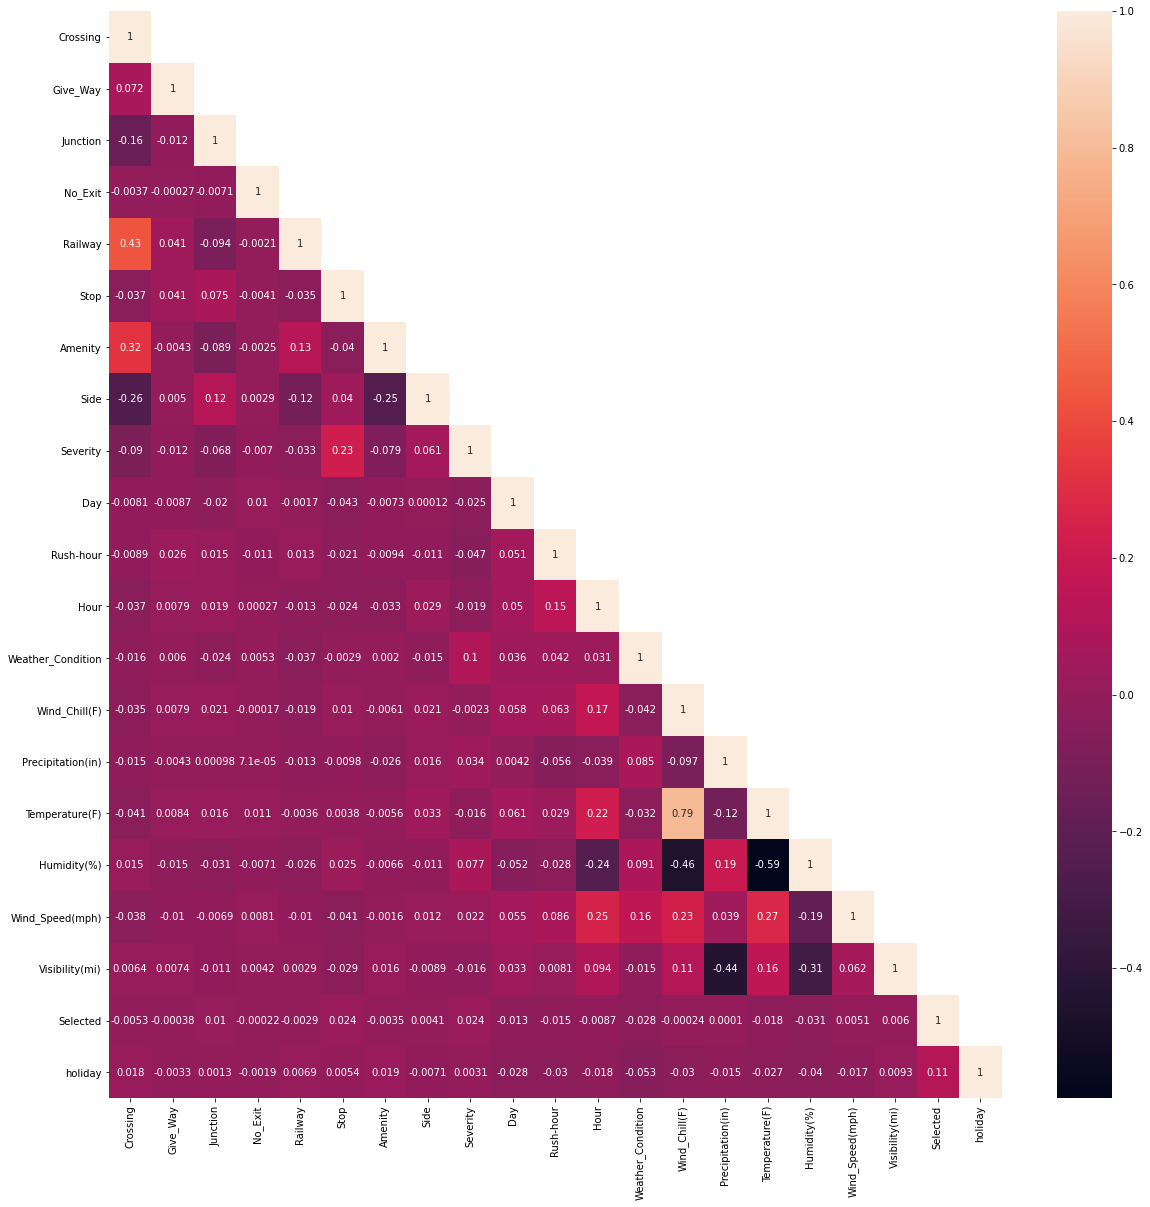

In [48]:
fig, ax = plt.subplots(figsize=(20,20))
cormat= new_df.drop(columns=['ID','Roundabout','Lat','Lng','Distance(mi)']).corr()
mask = np.array(cormat)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(cormat,mask=mask,annot=True)

In [49]:
# This cell is used to select the numerical features. IT SHOULD BE REMOVED AS YOU DO YOUR WORK.
#X_train = X_train[['Lat', 'Lng', 'Distance(mi)','Stop','Wind_Chill(F)','Precipitation(in)','Temperature(F)','Humidity(%)','Wind_Speed(mph)','holiday']]
#X_val = X_val[['Lat', 'Lng', 'Distance(mi)','Stop','Wind_Chill(F)','Precipitation(in)','Temperature(F)','Humidity(%)','Wind_Speed(mph)','holiday']]

X_train = X_train[['Lat', 'Lng', 'Distance(mi)','Stop','Wind_Chill(F)','Precipitation(in)','Temperature(F)','Humidity(%)','Wind_Speed(mph)','Visibility(mi)','Selected']]
X_val = X_val[['Lat', 'Lng', 'Distance(mi)','Stop','Wind_Chill(F)','Precipitation(in)','Temperature(F)','Humidity(%)','Wind_Speed(mph)','Visibility(mi)','Selected']]

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [50]:

from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)

Now let's test our classifier on the validation dataset and see the accuracy.

In [51]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.748829953198128


Well. That's a good start, right? A classifier that predicts all examples' `Severity` as 2 will get around 0.63. You should get better score as you add more features and do better data preprocessing.

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [52]:
test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58


In [53]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df.head()

new_test = test_df.drop(columns='Bump')
#cerating new list containing rush hours from timestamps
rush_hour = []
bool_rush_hour = []
for row in new_test['timestamp']:
    rush_hour.append(row[11:].split(":")[0])

for hour, minute in rush_hour:
    if int (hour) >= 7 and int (hour) <= 9:
        bool_rush_hour.append(True)
    elif int (hour) >=16 and int (hour) <= 19:
        bool_rush_hour.append(True)
    else:
        bool_rush_hour.append(False)
        

datetimelist=[]
day_week=[]
for row in new_test['timestamp']:
    datetimelist.append(row[:10].replace('-',' '))

for element in datetimelist:
    day_week.append(findDay(element))

day_week[:10]
day_week=convert_days_tonumbers(day_week)
new_test["Day"]=day_week
new_test["Rush-hour"]=bool_rush_hour


ord_enc = OrdinalEncoder()
new_test["Crossing"] = ord_enc.fit_transform(new_test[["Crossing"]])
new_test["Give_Way"] = ord_enc.fit_transform(new_test[["Give_Way"]])
new_test["Junction"] = ord_enc.fit_transform(new_test[["Junction"]])
new_test["No_Exit"] = ord_enc.fit_transform(new_test[["No_Exit"]])
new_test["Railway"] = ord_enc.fit_transform(new_test[["Railway"]])
new_test["Roundabout"] = ord_enc.fit_transform(new_test[["Roundabout"]])
new_test["Stop"] = ord_enc.fit_transform(new_test[["Stop"]])
new_test["Amenity"] = ord_enc.fit_transform(new_test[["Amenity"]])
new_test["Side"] = ord_enc.fit_transform(new_test[["Side"]])
new_test.head()


timestamp = new_test['timestamp']
Date = [i[:11]for i in timestamp ]
Hour = [i[11:13]for i in timestamp ]
new_test['date'] = Date
new_test['Hour'] = Hour
new_test['date']= pd.to_datetime(new_test['date'])
new_test['Hour']= new_test['Hour'].astype(int)

new_test.head()
    

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp,Day,Rush-hour,date,Hour
0,6407,37.786060,-122.390900,0.039,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2016-04-04 19:20:31,3,False,2016-04-04,19
1,6408,37.769609,-122.415057,0.202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-10-28 11:51:00,5,False,2020-10-28,11
2,6409,37.807495,-122.476021,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2019-09-09 07:36:45,3,False,2019-09-09,7
3,6410,37.761818,-122.405869,0.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2019-08-06 15:46:25,4,False,2019-08-06,15
4,6411,37.732350,-122.414100,0.670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018-10-17 09:54:58,5,False,2018-10-17,9


In [54]:
new_test = new_test.merge(weather, on =['date', 'Hour'], how='left')

new_test = new_test.merge(holidays, on ='date', how='left')

new_test['holiday'] = new_test['holiday'].replace(list(new_test['holiday'].dropna()),1)
new_test['holiday'] = new_test['holiday'].replace(np.nan,0)
new_test["Weather_Condition"] = ord_enc.fit_transform(new_test[["Weather_Condition"]])
new_test["Selected"] = ord_enc.fit_transform(new_test[["Selected"]])


Note that the test set has the same features and doesn't have the `Severity` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `Severity` column to the test `DataFrame` and add the values of the predicted class to it.

**I'll select the numerical features here as I did in the training set. DO NOT forget to change this step as you change the preprocessing of the training data.**

In [55]:
X_test = new_test.drop(columns=['ID'])

# You should update/remove the next line once you change the features used for training
X_test = X_test[['Lat', 'Lng', 'Distance(mi)','Stop','Wind_Chill(F)','Precipitation(in)','Temperature(F)','Humidity(%)','Wind_Speed(mph)','Visibility(mi)','Selected']]

y_test_predicted = classifier.predict(X_test)

new_test['Severity'] = y_test_predicted

new_test.head()

,ID,Lat,Lng,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,holiday,Severity
0,6407,37.786060,-122.390900,0.039,0.0,0.0,1.0,0.0,0.0,0.0,...,14.0,59.762515,0.006444,63.0,60.0,10.4,10.0,0.0,0.0,2
1,6408,37.769609,-122.415057,0.202,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,65.000000,0.000000,65.0,56.0,5.0,9.0,0.0,0.0,2
2,6409,37.807495,-122.476021,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,58.000000,0.000000,58.0,90.0,18.0,10.0,0.0,0.0,2
3,6410,37.761818,-122.405869,0.000,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,72.000000,0.000000,72.0,59.0,17.0,10.0,0.0,0.0,2
4,6411,37.732350,-122.414100,0.670,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,59.762515,0.006444,57.0,77.0,5.8,10.0,0.0,0.0,2


In [56]:
from sklearn.metrics import classification_report
print(classification_report(classifier.predict(X_train)
                            , y_train))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.99      0.72      0.84      4747
           3       0.23      0.92      0.37       378
           4       0.00      0.00      0.00         0

    accuracy                           0.74      5125
   macro avg       0.31      0.41      0.30      5125
weighted avg       0.94      0.74      0.80      5125



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now we're ready to generate the submission file. The submission file needs the columns `ID` and `Severity` only.

In [57]:
new_test[['ID', 'Severity']].to_csv('/kaggle/working/submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Scroll down until you see the output files then select the `submission.csv` file and click `Submit`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and the submission process. We chose not to go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and use it to create your submission.